In [4]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import LabelEncoder
# import pandas_profiling
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_selection import SelectKBest,mutual_info_regression, chi2,mutual_info_classif,f_classif,f_regression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import preprocessing as pp
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
# from kmodes.kprototypes import KPrototypes

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
#show multiple output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [173]:
df = pd.read_csv('results.csv')

In [174]:
df.head()
df.shape

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,116.37,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,67.42,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,116.37,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,67.83,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


(31984, 21)

Desciption columns:
- division: ranking in age
- official: finish time
- bib: race number determined by the qualifying race time
- genderdiv: ranking in gender
- ctz (citizen): nationality
- overall: overall ranking
- pace: overall average pace of the race

### Missing Values

In [6]:
(((df.isnull()|df.isna()).sum()/len(df))*100).round(2).sort_values(ascending = False)

ctz          96.11
state         8.05
40k           0.00
name          0.00
division      0.00
25k           0.00
gender        0.00
age           0.00
official      0.00
bib           0.00
genderdiv     0.00
35k           0.00
city          0.00
overall       0.00
pace          0.00
30k           0.00
5k            0.00
half          0.00
20k           0.00
country       0.00
10k           0.00
dtype: float64

Ctz is the highest missing column, and the next is "state". So I'll drop ctz column and change null in "State" to "Other"

In [175]:
df.drop(['ctz'],axis = 1, inplace = True)
# df=df[df['state'].notna()]
df['state'] = df['state'].replace(np.nan, 'Other')
(((df.isnull()|df.isna()).sum()/len(df))*100).round(2).sort_values(ascending = False)

40k          0.0
city         0.0
name         0.0
division     0.0
25k          0.0
gender       0.0
age          0.0
official     0.0
bib          0.0
genderdiv    0.0
35k          0.0
overall      0.0
pace         0.0
state        0.0
30k          0.0
5k           0.0
half         0.0
20k          0.0
country      0.0
10k          0.0
dtype: float64

In [8]:
df.shape

(31984, 20)

### Check data having 1 level

In [9]:
temp = []
for col in df:
    if df[col].nunique()>500:
        temp.append(col)
print('List columns have a lot of unique values: ',temp)

List columns have a lot of unique values:  ['10k', 'name', 'division', '25k', 'official', 'bib', 'genderdiv', '35k', 'overall', 'pace', '30k', '5k', 'half', '20k', 'city', '40k']


In [176]:
df.drop(['name','bib'],axis = 1, inplace = True)
df.head()
df.shape

,10k,division,25k,gender,age,official,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,8,47.67,M,47,85.25,8,71.40,8,3.27,Other,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,1,82.43,F,33,138.95,1,116.37,21,5.30,Other,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,1,45.80,M,41,80.60,1,67.42,1,3.08,Other,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,3,82.43,F,24,140.58,3,116.37,27,5.37,Other,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,2,46.37,M,40,81.23,2,67.83,2,3.10,Other,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


(31984, 18)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31649 entries, 0 to 31983
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   10k        31649 non-null  object 
 1   division   31649 non-null  int64  
 2   25k        31649 non-null  object 
 3   gender     31649 non-null  object 
 4   age        31649 non-null  int64  
 5   official   31649 non-null  float64
 6   genderdiv  31649 non-null  int64  
 7   35k        31649 non-null  object 
 8   overall    31649 non-null  int64  
 9   pace       31649 non-null  float64
 10  state      31649 non-null  object 
 11  30k        31649 non-null  object 
 12  5k         31649 non-null  object 
 13  half       31649 non-null  object 
 14  20k        31649 non-null  object 
 15  country    31649 non-null  object 
 16  city       31648 non-null  object 
 17  40k        31649 non-null  object 
dtypes: float64(2), int64(4), object(12)
memory usage: 4.6+ MB


There are some rows in elapsed time of the race columns not having actual value display by "-". So we also drop these rows like above

In [177]:
df.shape
df=df[df['5k']!= '-']
df.shape
df=df[df['10k']!= '-']
df.shape
df=df[df['20k']!= '-']
df.shape
df=df[df['half']!= '-']
df.shape
df=df[df['25k']!= '-']
df.shape
df=df[df['30k']!= '-']
df.shape
df=df[df['35k']!= '-']
df.shape
df=df[df['40k']!= '-']
df.shape

(31984, 18)

(31932, 18)

(31914, 18)

(31894, 18)

(31854, 18)

(31679, 18)

(31669, 18)

(31655, 18)

(31649, 18)

In [151]:
df[['5k','10k','20k','half','25k','35k','30k','40k']] = df[['5k','10k','20k','half','25k','35k','30k','40k']].astype('float')
# df[['division','genderdiv','overall']]=df[['division','genderdiv','overall']].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31649 entries, 0 to 31983
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   10k        31649 non-null  float64
 1   division   31649 non-null  int64  
 2   25k        31649 non-null  float64
 3   gender     31649 non-null  object 
 4   age        31649 non-null  int64  
 5   official   31649 non-null  float64
 6   genderdiv  31649 non-null  int64  
 7   35k        31649 non-null  float64
 8   overall    31649 non-null  int64  
 9   pace       31649 non-null  float64
 10  state      31649 non-null  object 
 11  30k        31649 non-null  float64
 12  5k         31649 non-null  float64
 13  half       31649 non-null  float64
 14  20k        31649 non-null  float64
 15  country    31649 non-null  object 
 16  city       31648 non-null  object 
 17  40k        31649 non-null  float64
dtypes: float64(10), int64(4), object(4)
memory usage: 4.6+ MB


### Handling Outliers

In [152]:
df.describe(percentiles = [.1,.25,.5,.75,.95,.99])

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k
count,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000
mean,51.629039,1922.747291,133.581175,42.385067,241.952383,8002.921988,196.033373,15833.958924,9.236463,163.894883,25.678261,111.211481,105.321404,228.189990
std,8.710102,1704.843679,25.571480,11.299795,50.842552,4733.255987,40.775036,9182.223743,1.939150,32.889354,4.215381,20.306387,19.159500,48.074493
min,16.620000,1.000000,45.800000,18.000000,80.600000,1.000000,67.420000,1.000000,3.080000,56.450000,7.750000,38.030000,36.100000,76.100000
10%,41.650000,214.000000,105.050000,27.000000,184.400000,1559.800000,150.396000,3114.800000,7.030000,127.296000,20.850000,88.330000,83.730000,173.930000
25%,45.370000,607.000000,115.430000,33.000000,205.300000,3940.000000,166.950000,7880.000000,7.830000,140.520000,22.620000,96.750000,91.670000,193.620000
50%,50.280000,1418.000000,128.850000,42.000000,231.980000,7919.000000,187.850000,15829.000000,8.850000,157.500000,25.050000,107.680000,102.000000,218.470000
75%,57.000000,2601.000000,147.700000,50.000000,272.200000,11893.000000,219.370000,23785.000000,10.380000,182.200000,28.400000,122.680000,116.150000,256.570000
95%,67.570000,5613.600000,183.620000,61.000000,340.512000,15914.600000,276.130000,30149.600000,13.000000,228.562000,33.150000,150.126000,141.930000,321.700000
99%,74.806000,6610.520000,206.115600,68.000000,380.970000,17184.520000,309.875200,31440.520000,14.530000,257.477200,36.610400,167.990400,158.976000,360.120000


In [153]:
df_num = df.select_dtypes(include = ['int64','float64'])
df_cate = df.select_dtypes(include = ['category','object'])
df_num.head()
df_cate.head()

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k
0,17.37,8,47.67,47,85.25,8,71.40,8,3.27,59.18,8.02,39.72,37.65,80.43
1,32.58,1,82.43,33,138.95,1,116.37,21,5.30,99.33,16.22,69.47,65.83,132.10
2,16.62,1,45.80,41,80.60,1,67.42,1,3.08,56.45,7.75,38.03,36.10,76.10
3,32.57,3,82.43,24,140.58,3,116.37,27,5.37,99.33,16.20,69.47,65.83,132.95
4,17.12,2,46.37,40,81.23,2,67.83,2,3.10,57.03,8.02,38.60,36.58,76.72


,gender,state,country,city
0,M,Other,JPN,Fukuoka
1,F,Other,KEN,Eldoret
2,M,Other,RSA,Paarl
3,F,Other,ETH,Shoa
4,M,Other,JPN,Nogata Fukuoka


In [16]:
df['state'].value_counts()

MA       7427
Other    2546
CA       2302
NY       1537
ON       1045
PA        997
TX        988
IL        911
OH        754
FL        745
VA        709
MI        689
NC        617
WA        595
CO        576
NJ        564
MN        554
MD        522
NH        521
CT        520
GA        441
UT        429
WI        429
QC        418
OR        405
AZ        316
IN        290
TN        255
MO        253
ME        249
RI        232
AB        206
BC        205
DC        203
SC        182
IA        152
KY        144
KS        141
VT        141
ID        123
NE        110
NS        108
AL        104
OK         92
NV         87
LA         77
NM         71
MT         65
DE         63
WV         56
NB         55
AK         49
HI         48
AR         48
MB         47
MS         44
SK         32
SD         32
ND         31
PE         23
WY         22
PR         17
NL         17
AE          7
YT          5
NT          3
AP          1
AA          1
GU          1
Name: state, dtype: int64

In [17]:
df['country'].value_counts()

USA    26939
CAN     2164
GBR      341
ITA      209
MEX      202
GER      180
JPN      172
AUS      123
IRL      116
FRA      113
ESP       87
BRA       86
SWE       66
SUI       62
KOR       60
NED       54
HKG       53
DEN       49
CHN       42
COL       40
CHI       29
FIN       28
BEL       27
ISL       27
SIN       23
AUT       21
NOR       21
RSA       19
VEN       19
TPE       18
RUS       18
UAE       17
NZL       17
BER       17
CRC       16
GUA       15
ARG       15
POL       15
KEN       12
POR        9
SLO        9
GRE        8
PER        7
ISR        7
IND        6
ETH        6
PHI        4
LUX        4
SVK        4
CZE        4
TUR        4
UKR        3
HUN        3
MAS        3
ECU        3
PAN        3
DOM        3
BAH        2
ESA        2
ROU        2
EGY        2
QAT        2
THA        2
VGB        1
CRO        1
CAY        1
BLR        1
BAR        1
LIE        1
URU        1
ZIM        1
TRI        1
EST        1
BOL        1
TAN        1
BRN        1
INA        1

In [18]:
df['city'].value_counts()

Boston                   1018
New York                  497
Chicago                   312
Cambridge                 306
Somerville                239
                         ... 
Modiin                      1
Scappoose                   1
Springhill                  1
San Pedro Garza Garca       1
Burnham On Crouch           1
Name: city, Length: 5905, dtype: int64

In [179]:
def state_convert(value):
    if value in ('MA','CA','NY','ON','Boston','New York','USA','CAN'):
        return value
    else:
        return 'Other'

In [180]:
df['state_1']=df['state'].map(state_convert)
df['city_1']=df['city'].map(state_convert)
df['country_1']=df['country'].map(state_convert)
df.head()

,10k,division,25k,gender,age,official,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k,state_1,city_1,country_1
0,17.37,8,47.67,M,47,85.25,8,71.40,8,3.27,Other,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43,Other,Other,Other
1,32.58,1,82.43,F,33,138.95,1,116.37,21,5.30,Other,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10,Other,Other,Other
2,16.62,1,45.80,M,41,80.60,1,67.42,1,3.08,Other,56.45,7.75,38.03,36.10,RSA,Paarl,76.10,Other,Other,Other
3,32.57,3,82.43,F,24,140.58,3,116.37,27,5.37,Other,99.33,16.20,69.47,65.83,ETH,Shoa,132.95,Other,Other,Other
4,17.12,2,46.37,M,40,81.23,2,67.83,2,3.10,Other,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72,Other,Other,Other


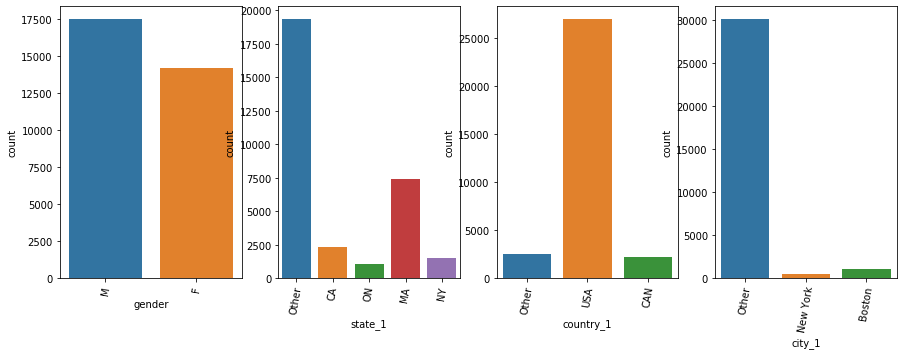

In [18]:
fig, ax = plt.subplots(1, 4, figsize=(15,5))
df_cate = df.select_dtypes(include = ['category','object'])
df_ct_brief = df_cate[['gender','state_1','country_1','city_1']]
# df_ct_brief.head()
for variable, subplot in zip(df_ct_brief, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(80)

In [19]:
lb = LabelEncoder()
df1 = df.copy()
df1.drop(['state','city','division','official','genderdiv','overall','country'],axis = 1, inplace = True)
# df_ct_brief = df[['UniqueCarrier','Origin',	'Dest']]
for col in df_ct_brief:
    print(col)
#     df1[col+'_encoded'] = lb.fit_transform(df1[col]).astype(str)
    df1[col+'_encoded'] = lb.fit_transform(df1[col].astype(str))
df_encode = df1.drop(df_ct_brief,axis = 1)
df_encode.head()

gender
state_1
country_1
city_1


,10k,25k,age,35k,pace,30k,5k,half,20k,40k,gender_encoded,state_1_encoded,country_1_encoded,city_1_encoded
0,17.37,47.67,47,71.40,3.27,59.18,8.02,39.72,37.65,80.43,1,4,1,2
1,32.58,82.43,33,116.37,5.30,99.33,16.22,69.47,65.83,132.10,0,4,1,2
2,16.62,45.80,41,67.42,3.08,56.45,7.75,38.03,36.10,76.10,1,4,1,2
3,32.57,82.43,24,116.37,5.37,99.33,16.20,69.47,65.83,132.95,0,4,1,2
4,17.12,46.37,40,67.83,3.10,57.03,8.02,38.60,36.58,76.72,1,4,1,2


In [20]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31649 entries, 0 to 31983
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   10k                31649 non-null  float64
 1   25k                31649 non-null  float64
 2   age                31649 non-null  int64  
 3   35k                31649 non-null  float64
 4   pace               31649 non-null  float64
 5   30k                31649 non-null  float64
 6   5k                 31649 non-null  float64
 7   half               31649 non-null  float64
 8   20k                31649 non-null  float64
 9   40k                31649 non-null  float64
 10  gender_encoded     31649 non-null  int32  
 11  state_1_encoded    31649 non-null  int32  
 12  country_1_encoded  31649 non-null  int32  
 13  city_1_encoded     31649 non-null  int32  
dtypes: float64(9), int32(4), int64(1)
memory usage: 3.1 MB


In [181]:
def outliers_treatment(column):
    q1 = df_encode[column].quantile(0.25)
    q3 = df_encode[column].quantile(0.75)
    iqr= q3 -q1
#     iqr1 = stats.iqr(df[col], interpolation = 'midpoint')
    lower = q1 - 1.5*iqr
    upper = q3 +1.5*iqr
    return lower,upper

List column having outliers:  ['10k', '20k', '25k', '30k', '35k', '40k', '5k', 'age', 'city_1_encoded', 'country_encoded', 'half', 'pace']


<Figure size 576x288 with 0 Axes>

(array([2.8000e+01, 2.7600e+02, 7.1030e+03, 1.2632e+04, 6.5050e+03,
        2.2150e+03, 3.1700e+02, 2.2000e+01, 4.0000e+00, 1.0000e+00]),
 array([ 17.12 ,  26.646,  36.172,  45.698,  55.224,  64.75 ,  74.276,
         83.802,  93.328, 102.854, 112.38 ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, '10k')

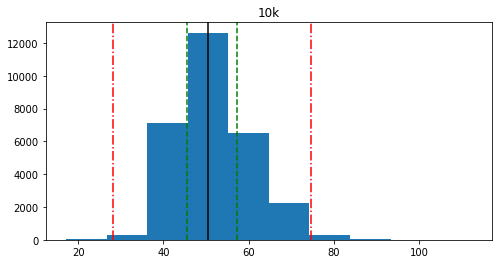

<Figure size 576x288 with 0 Axes>

(array([2.600e+01, 5.380e+02, 7.877e+03, 1.172e+04, 5.689e+03, 2.470e+03,
        7.000e+02, 7.500e+01, 6.000e+00, 2.000e+00]),
 array([ 38.02 ,  56.653,  75.286,  93.919, 112.552, 131.185, 149.818,
        168.451, 187.084, 205.717, 224.35 ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, '20k')

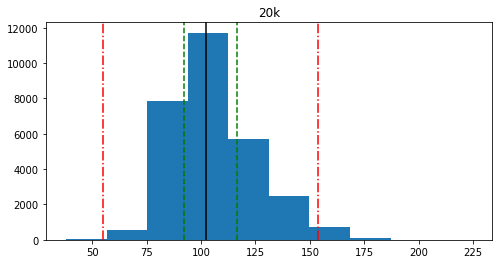

<Figure size 576x288 with 0 Axes>

(array([2.6000e+01, 8.0100e+02, 8.9250e+03, 1.1048e+04, 5.1970e+03,
        2.2470e+03, 7.6400e+02, 8.6000e+01, 6.0000e+00, 3.0000e+00]),
 array([ 48.55 ,  72.597,  96.644, 120.691, 144.738, 168.785, 192.832,
        216.879, 240.926, 264.973, 289.02 ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, '25k')

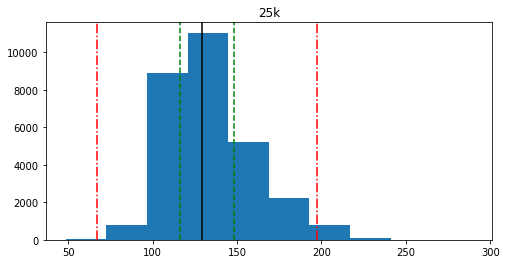

<Figure size 576x288 with 0 Axes>

(array([2.8000e+01, 1.6720e+03, 1.1584e+04, 9.2100e+03, 4.2870e+03,
        1.8210e+03, 4.6200e+02, 3.5000e+01, 2.0000e+00, 2.0000e+00]),
 array([ 59.77 ,  91.431, 123.092, 154.753, 186.414, 218.075, 249.736,
        281.397, 313.058, 344.719, 376.38 ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, '30k')

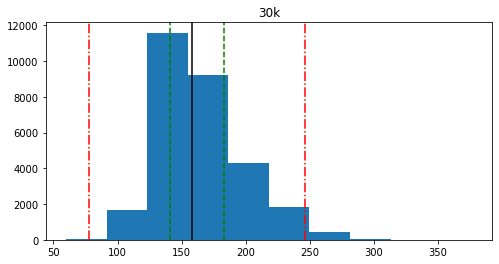

<Figure size 576x288 with 0 Axes>

(array([2.7000e+01, 1.8840e+03, 1.1384e+04, 8.8540e+03, 4.3920e+03,
        1.9380e+03, 5.6800e+02, 5.2000e+01, 2.0000e+00, 2.0000e+00]),
 array([ 70.83, 108.68, 146.53, 184.38, 222.23, 260.08, 297.93, 335.78,
        373.63, 411.48, 449.33]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, '35k')

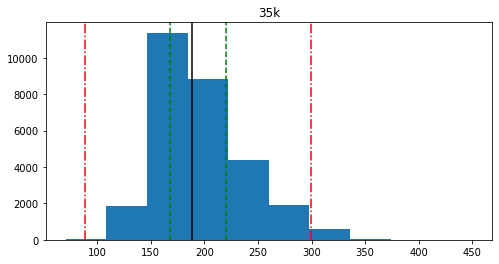

<Figure size 576x288 with 0 Axes>

(array([2.6000e+01, 1.4110e+03, 1.0169e+04, 9.3260e+03, 4.8940e+03,
        2.3970e+03, 7.8700e+02, 8.8000e+01, 3.0000e+00, 2.0000e+00]),
 array([ 80.18 , 122.997, 165.814, 208.631, 251.448, 294.265, 337.082,
        379.899, 422.716, 465.533, 508.35 ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, '40k')

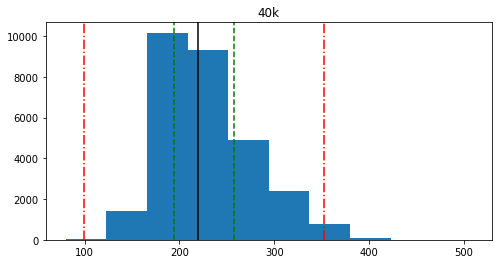

<Figure size 576x288 with 0 Axes>

(array([5.0000e+01, 1.0253e+04, 1.5989e+04, 2.7550e+03, 5.3000e+01,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 8.02 , 15.913, 23.806, 31.699, 39.592, 47.485, 55.378, 63.271,
        71.164, 79.057, 86.95 ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, '5k')

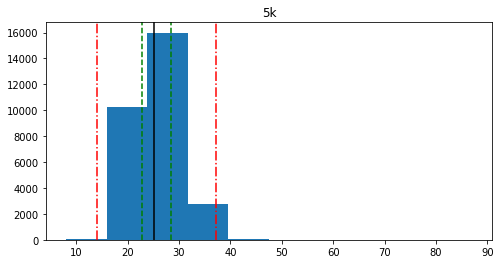

<Figure size 576x288 with 0 Axes>

(array([1437., 4102., 4351., 5947., 5432., 4144., 2558.,  889.,  199.,
          44.]),
 array([18. , 24.3, 30.6, 36.9, 43.2, 49.5, 55.8, 62.1, 68.4, 74.7, 81. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'age')

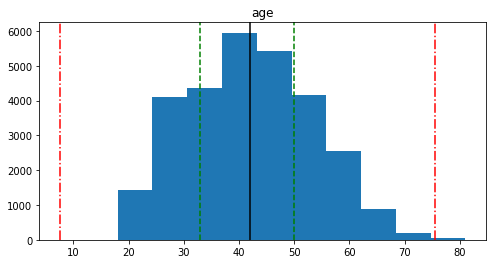

<Figure size 576x288 with 0 Axes>

(array([ 1018.,     0.,     0.,     0.,     0.,   497.,     0.,     0.,
            0., 27588.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'city_1_encoded')

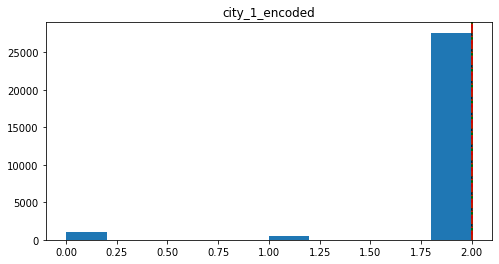

<Figure size 576x288 with 0 Axes>

(array([ 2164.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 26939.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'country_encoded')

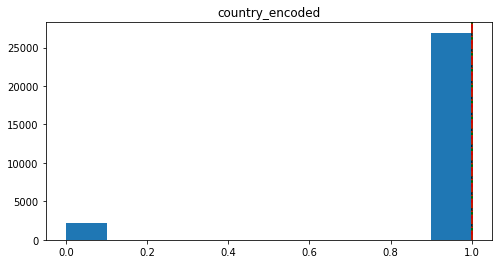

<Figure size 576x288 with 0 Axes>

(array([2.7000e+01, 5.4600e+02, 7.8790e+03, 1.1691e+04, 5.6840e+03,
        2.4730e+03, 7.1000e+02, 8.4000e+01, 7.0000e+00, 2.0000e+00]),
 array([ 40.2  ,  59.847,  79.494,  99.141, 118.788, 138.435, 158.082,
        177.729, 197.376, 217.023, 236.67 ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'half')

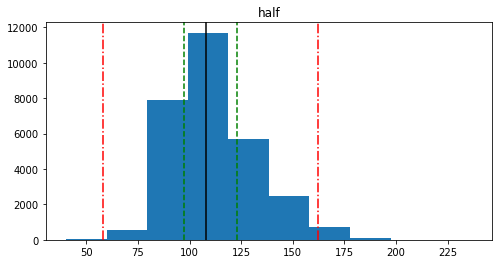

<Figure size 576x288 with 0 Axes>

(array([2.6000e+01, 1.4330e+03, 1.0095e+04, 9.3060e+03, 4.9640e+03,
        2.4450e+03, 7.5500e+02, 7.4000e+01, 3.0000e+00, 2.0000e+00]),
 array([ 3.25 ,  4.982,  6.714,  8.446, 10.178, 11.91 , 13.642, 15.374,
        17.106, 18.838, 20.57 ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'pace')

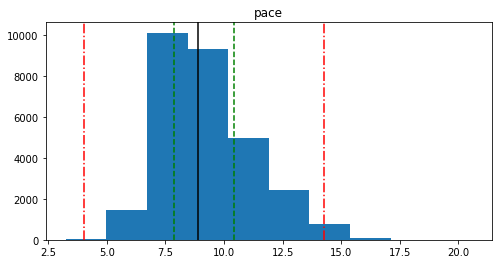

In [61]:
#show list column having outliers
temp = []
# df_temp = df_encode[df_encode.columns.difference(['Date_Part','Date','UniqueCarrier_encoded',	'Origin_encoded',	'Dest_encoded'])]
for col in df_encode:
    # print(col)
    lower, upper = outliers_treatment(col)
    x=np.array(df_encode[col])
    for j in x:
        if j < lower or j > upper:
            temp.append(col)
            break

print('List column having outliers: ',temp)
for col in temp:
    plt.figure(figsize=(8,4))
    plt.hist(df_encode[col])
    lower, upper = outliers_treatment(col)
    # np.percentile(df['MonthlyIncome'] , [25])
    plt.title(col)
    plt.axvline(lower, linestyle='dashdot', color='red')
    plt.axvline(np.percentile(df_encode[col] , [25]), linestyle='--', color='green')
    plt.axvline(np.percentile(df_encode[col] , [50]), linestyle='-',  color='black')
    plt.axvline(np.percentile(df_encode[col] , [75]), linestyle='--', color='green')
    plt.axvline(upper, linestyle='dashdot', color='red')
    plt.show()

In [22]:
for col in df_encode:
    print(col)
    lower, upper = outliers_treatment(col)
    out = ((df_encode[col] < lower) | (df_encode[col] >upper )).sum()
    per_out = round((out/len(df_encode)),2)*100
    print(per_out)

10k
1.0
25k
2.0
age
0.0
35k
2.0
pace
2.0
30k
2.0
5k
1.0
half
2.0
20k
2.0
40k
2.0
gender_encoded
0.0
state_1_encoded
0.0
country_1_encoded
15.0
city_1_encoded
5.0


In [182]:
df.shape
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1


df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(31649, 21)

(29658, 21)

In [183]:
df.head()

,10k,division,25k,gender,age,official,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k,state_1,city_1,country_1
1,32.58,1,82.43,F,33,138.95,1,116.37,21,5.30,Other,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10,Other,Other,Other
3,32.57,3,82.43,F,24,140.58,3,116.37,27,5.37,Other,99.33,16.20,69.47,65.83,ETH,Shoa,132.95,Other,Other,Other
5,32.58,4,82.45,F,29,140.68,4,116.37,28,5.37,Other,99.33,16.22,69.47,65.83,KEN,Nandi,132.95,Other,Other,Other
7,30.48,5,76.95,M,29,129.83,5,107.47,5,4.97,Other,92.52,15.17,64.85,61.62,ETH,Addis Ababa,122.80,Other,Other,Other
9,30.48,20,77.68,M,31,137.83,20,112.27,20,5.27,CA,94.78,15.15,65.23,61.78,USA,Redding,129.83,CA,Other,USA


In [184]:
df.drop(['city','state','country'],axis = 1, inplace = True)

### Check correlation

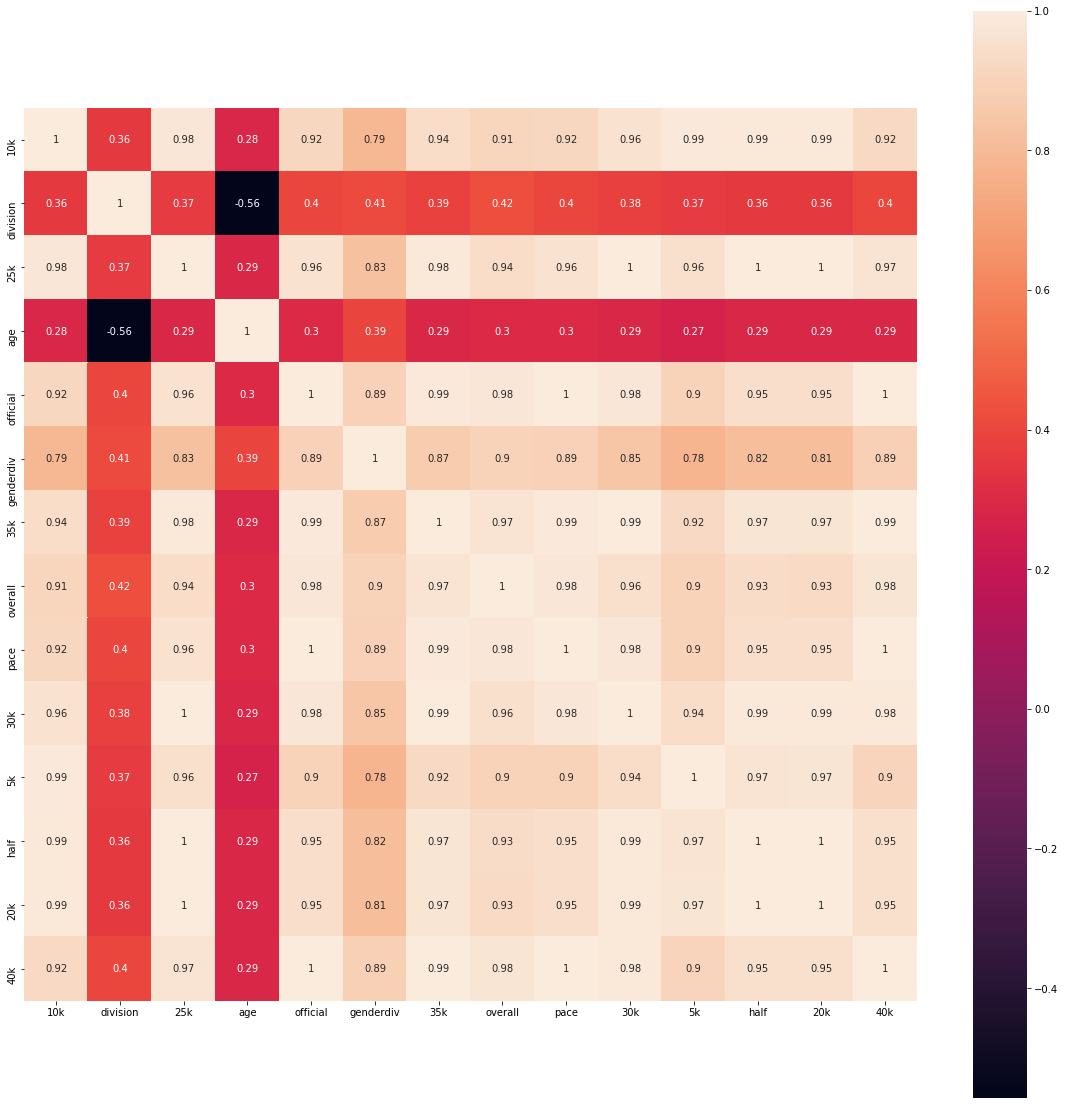

In [159]:
corr_matrix = df.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr_matrix, vmax=1, annot=True, square=True);
plt.show()

In [30]:
df.head()

,10k,division,25k,gender,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k,state_1,city_1,country_1
1,32.58,1,82.43,F,33,138.95,1,116.37,21,5.30,99.33,16.22,69.47,65.83,132.10,Other,Other,Other
3,32.57,3,82.43,F,24,140.58,3,116.37,27,5.37,99.33,16.20,69.47,65.83,132.95,Other,Other,Other
5,32.58,4,82.45,F,29,140.68,4,116.37,28,5.37,99.33,16.22,69.47,65.83,132.95,Other,Other,Other
7,30.48,5,76.95,M,29,129.83,5,107.47,5,4.97,92.52,15.17,64.85,61.62,122.80,Other,Other,Other
9,30.48,20,77.68,M,31,137.83,20,112.27,20,5.27,94.78,15.15,65.23,61.78,129.83,CA,Other,USA


c:\users\my\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<AxesSubplot:title={'center':'10k'}>,
        <AxesSubplot:title={'center':'25k'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'35k'}>],
       [<AxesSubplot:title={'center':'pace'}>,
        <AxesSubplot:title={'center':'30k'}>,
        <AxesSubplot:title={'center':'5k'}>,
        <AxesSubplot:title={'center':'half'}>],
       [<AxesSubplot:title={'center':'20k'}>,
        <AxesSubplot:title={'center':'40k'}>,
        <AxesSubplot:title={'center':'gender_encoded'}>,
        <AxesSubplot:title={'center':'state_1_encoded'}>],
       [<AxesSubplot:title={'center':'country_1_encoded'}>,
        <AxesSubplot:title={'center':'city_1_encoded'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

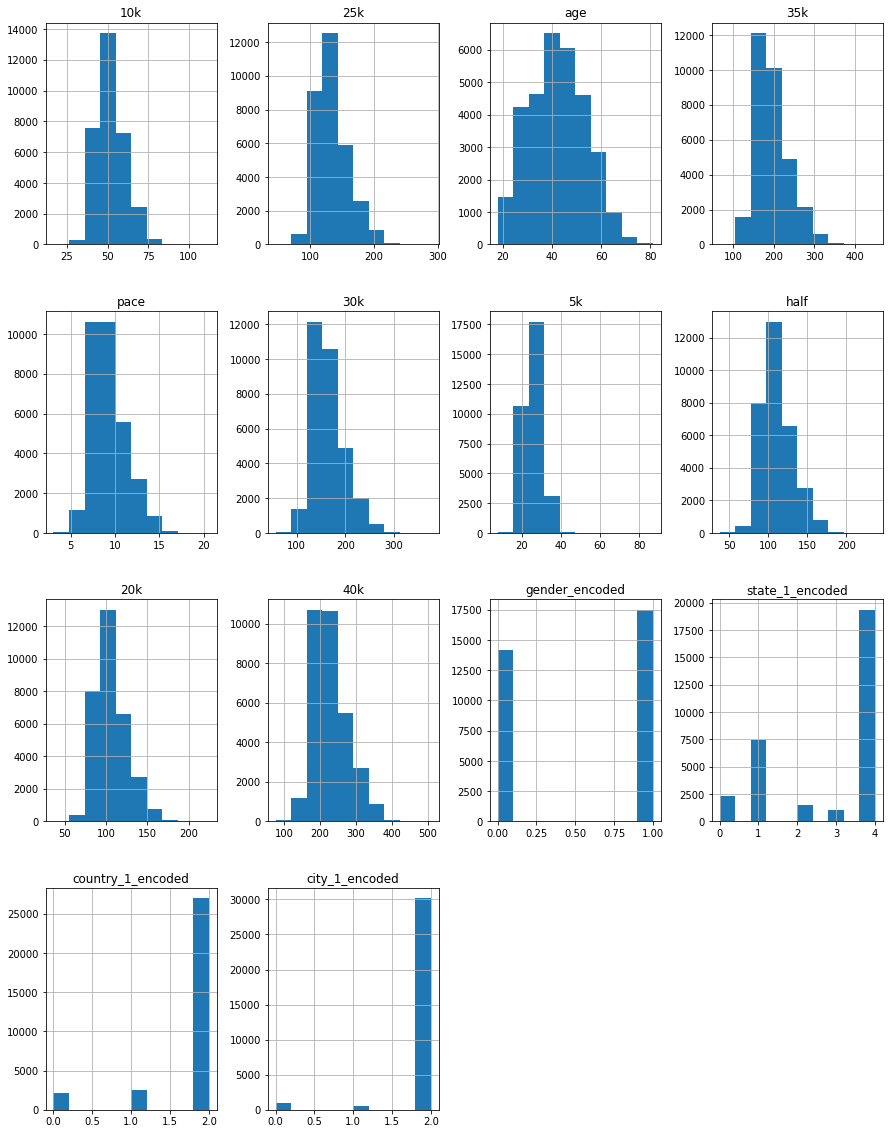

In [25]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_encode.hist(ax =ax)

In [72]:
# df.drop(['bib'],axis =1, inplace = True)

### Scaling Features

In [185]:
df.head()

,10k,division,25k,gender,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k,state_1,city_1,country_1
1,32.58,1,82.43,F,33,138.95,1,116.37,21,5.30,99.33,16.22,69.47,65.83,132.10,Other,Other,Other
3,32.57,3,82.43,F,24,140.58,3,116.37,27,5.37,99.33,16.20,69.47,65.83,132.95,Other,Other,Other
5,32.58,4,82.45,F,29,140.68,4,116.37,28,5.37,99.33,16.22,69.47,65.83,132.95,Other,Other,Other
7,30.48,5,76.95,M,29,129.83,5,107.47,5,4.97,92.52,15.17,64.85,61.62,122.80,Other,Other,Other
9,30.48,20,77.68,M,31,137.83,20,112.27,20,5.27,94.78,15.15,65.23,61.78,129.83,CA,Other,USA


In [186]:
df2 = df.copy()
df2.drop(['pace','overall'],axis =1, inplace = True)
df2 = pd.get_dummies(df2)
df2.drop(['gender_M'],axis = 1, inplace = True)
df2.head()

,division,age,official,genderdiv,10k_112.38,10k_20.65,10k_21.55,10k_21.60,10k_22.63,10k_22.65,10k_24.20,10k_25.28,10k_25.62,10k_26.98,10k_29.60,10k_30.33,10k_30.48,10k_30.50,10k_30.52,10k_30.53,10k_30.75,10k_30.82,10k_30.83,10k_31.15,10k_31.22,10k_31.37,10k_31.87,10k_32.12,10k_32.13,10k_32.15,10k_32.37,10k_32.42,10k_32.45,10k_32.53,10k_32.57,10k_32.58,10k_32.60,10k_32.62,10k_32.63,10k_32.70,10k_32.77,10k_32.78,10k_32.85,10k_32.92,10k_32.97,10k_32.98,10k_33.00,10k_33.02,10k_33.15,10k_33.22,10k_33.23,10k_33.27,10k_33.28,10k_33.30,10k_33.35,10k_33.42,10k_33.43,10k_33.45,10k_33.62,10k_33.68,10k_33.77,10k_33.78,10k_33.80,10k_33.82,10k_33.83,10k_33.87,10k_33.88,10k_33.92,10k_33.93,10k_33.95,10k_33.98,10k_34.00,10k_34.05,10k_34.07,10k_34.08,10k_34.10,10k_34.12,10k_34.15,10k_34.17,10k_34.18,10k_34.20,10k_34.22,10k_34.23,10k_34.25,10k_34.32,10k_34.35,10k_34.37,10k_34.40,10k_34.42,10k_34.48,10k_34.50,10k_34.55,10k_34.58,10k_34.63,10k_34.65,10k_34.67,10k_34.68,10k_34.70,10k_34.73,10k_34.75,10k_34.78,10k_34.80,10k_34.82,10k_34.83,10k_34.87,10k_34.88,10k_34.90,10k_34.92,10k_34.93,10k_34.95,10k_34.98,10k_35.00,10k_35.02,10k_35.03,10k_35.12,10k_35.13,10k_35.17,10k_35.20,10k_35.22,10k_35.23,10k_35.25,10k_35.27,10k_35.35,10k_35.38,10k_35.40,10k_35.43,10k_35.45,10k_35.47,10k_35.48,10k_35.50,10k_35.52,10k_35.53,10k_35.57,10k_35.60,10k_35.62,10k_35.63,10k_35.65,10k_35.67,10k_35.68,10k_35.70,10k_35.72,10k_35.73,10k_35.77,10k_35.80,10k_35.83,10k_35.85,10k_35.90,10k_35.92,10k_35.93,10k_35.95,10k_35.97,10k_35.98,10k_36.00,10k_36.02,10k_36.03,10k_36.05,10k_36.07,10k_36.08,10k_36.10,10k_36.12,10k_36.13,10k_36.15,10k_36.17,10k_36.18,10k_36.20,10k_36.22,10k_36.23,10k_36.25,10k_36.27,10k_36.28,10k_36.30,10k_36.32,10k_36.33,10k_36.35,10k_36.37,10k_36.38,10k_36.40,10k_36.42,10k_36.43,10k_36.45,10k_36.47,10k_36.48,10k_36.50,10k_36.52,10k_36.53,10k_36.55,10k_36.57,10k_36.58,10k_36.60,10k_36.62,10k_36.63,10k_36.65,10k_36.67,10k_36.68,10k_36.70,10k_36.72,10k_36.73,10k_36.75,10k_36.77,10k_36.78,10k_36.80,10k_36.82,10k_36.83,10k_36.85,10k_36.87,10k_36.88,10k_36.90,10k_36.92,10k_36.93,10k_36.95,10k_36.97,10k_36.98,10k_37.00,10k_37.02,10k_37.03,10k_37.05,10k_37.07,10k_37.08,10k_37.10,10k_37.12,10k_37.13,10k_37.15,10k_37.17,10k_37.18,10k_37.20,10k_37.22,10k_37.23,10k_37.25,10k_37.27,10k_37.28,10k_37.30,10k_37.32,10k_37.33,10k_37.35,10k_37.37,10k_37.38,10k_37.40,10k_37.42,10k_37.43,10k_37.45,10k_37.47,10k_37.48,10k_37.50,10k_37.52,10k_37.53,10k_37.55,10k_37.57,10k_37.58,10k_37.60,10k_37.62,...,40k_335.07,40k_335.08,40k_335.10,40k_335.13,40k_335.15,40k_335.18,40k_335.23,40k_335.37,40k_335.43,40k_335.45,40k_335.47,40k_335.55,40k_335.62,40k_335.73,40k_335.75,40k_335.87,40k_335.88,40k_336.03,40k_336.08,40k_336.15,40k_336.17,40k_336.20,40k_336.27,40k_336.30,40k_336.35,40k_336.42,40k_336.43,40k_336.57,40k_336.58,40k_336.62,40k_336.72,40k_336.75,40k_336.85,40k_336.97,40k_337.07,40k_337.12,40k_337.15,40k_337.23,40k_337.32,40k_337.38,40k_337.43,40k_337.45,40k_337.62,40k_337.63,40k_337.65,40k_337.73,40k_337.87,40k_337.88,40k_337.90,40k_337.92,40k_338.00,40k_338.02,40k_338.07,40k_338.08,40k_338.17,40k_338.23,40k_338.30,40k_338.35,40k_338.40,40k_338.47,40k_338.48,40k_338.55,40k_338.72,40k_338.85,40k_338.95,40k_338.98,40k_339.00,40k_339.03,40k_339.08,40k_339.13,40k_339.18,40k_339.20,40k_339.22,40k_339.25,40k_339.30,40k_339.32,40k_339.37,40k_339.40,40k_339.60,40k_339.67,40k_339.70,40k_339.73,40k_339.85,40k_339.87,40k_340.05,40k_340.07,40k_340.08,40k_340.12,40k_340.22,40k_340.25,40k_340.28,40k_340.52,40k_340.55,40k_340.57,40k_340.58,40k_340.68,40k_340.72,40k_340.75,40k_340.82,40k_341.03,40k_341.08,40k_341.10,40k_341.12,40k_341.13,40k_341.23,40k_341.25,40k_341.27,40k_341.32,40k_341.33,40k_341.35,40k_341.40,40k_341.53,40k_341.82,40k_341.95,40k_342.07,40k_342.08,40k_342.12,40k_342.17,40k_342.18,40k_342.37,40k_342.40,40k_342.55,40k_342.68,40k_342.82,40k_342.95,40k_343.03,40k_343.05,40k_343.10,40k_343.12,40k_343.25,40k_343.27,40k_343.35,40k_343.40,40k_343.50,40k_343.63,40k_343.77,40k_34

In [161]:
x = df2[df2.columns.difference(['5k','10k','20k','half','25k','35k','30k','40k','official'])]
y = df2[['5k','10k','20k','half','25k','35k','30k','40k','official']]

In [53]:
z = df2[df2.columns.difference(['5k','10k','20k','half','25k','35k','30k','40k','official'])]

In [35]:
x.head()
y.head()

,age,city_1_Boston,city_1_New York,city_1_Other,country_1_CAN,country_1_Other,country_1_USA,division,gender_F,genderdiv,state_1_CA,state_1_MA,state_1_NY,state_1_ON,state_1_Other
1,33,0,0,1,0,1,0,1,1,1,0,0,0,0,1
3,24,0,0,1,0,1,0,3,1,3,0,0,0,0,1
5,29,0,0,1,0,1,0,4,1,4,0,0,0,0,1
7,29,0,0,1,0,1,0,5,0,5,0,0,0,0,1
9,31,0,0,1,0,0,1,20,0,20,1,0,0,0,0


,5k,10k,20k,half,25k,35k,30k,40k,official
1,16.22,32.58,65.83,69.47,82.43,116.37,99.33,132.10,138.95
3,16.20,32.57,65.83,69.47,82.43,116.37,99.33,132.95,140.58
5,16.22,32.58,65.83,69.47,82.45,116.37,99.33,132.95,140.68
7,15.17,30.48,61.62,64.85,76.95,107.47,92.52,122.80,129.83
9,15.15,30.48,61.78,65.23,77.68,112.27,94.78,129.83,137.83


In [54]:
x.info()
x[['age','division','genderdiv']] = x[['age','division','genderdiv']].astype('float')
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29382 entries, 1 to 31983
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              29382 non-null  int64
 1   city_1_Boston    29382 non-null  uint8
 2   city_1_New York  29382 non-null  uint8
 3   city_1_Other     29382 non-null  uint8
 4   country_1_CAN    29382 non-null  uint8
 5   country_1_Other  29382 non-null  uint8
 6   country_1_USA    29382 non-null  uint8
 7   division         29382 non-null  int64
 8   gender_F         29382 non-null  uint8
 9   genderdiv        29382 non-null  int64
 10  state_1_CA       29382 non-null  uint8
 11  state_1_MA       29382 non-null  uint8
 12  state_1_NY       29382 non-null  uint8
 13  state_1_ON       29382 non-null  uint8
 14  state_1_Other    29382 non-null  uint8
dtypes: int64(3), uint8(12)
memory usage: 1.2 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29382 entries, 1 to 31983
Data columns (tota

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [162]:
scaler=MinMaxScaler(feature_range=(0, 1), copy=True)

t=scaler.fit_transform(x)

In [163]:
t = pd.DataFrame(t)
t.columns = x.columns

In [164]:
t.describe(percentiles = [.1,.25,.5,.75,.95,.99])

,age,city_1_Boston,city_1_New York,city_1_Other,country_1_CAN,country_1_Other,country_1_USA,division,gender_F,genderdiv,state_1_CA,state_1_MA,state_1_NY,state_1_ON,state_1_Other
count,29382.000000,29382.000000,29382.000000,29382.000000,29382.000000,29382.000000,29382.000000,29382.000000,29382.000000,29382.000000,29382.000000,29382.000000,29382.000000,29382.000000,29382.000000
mean,0.435846,0.026921,0.015996,0.957083,0.072459,0.083895,0.843646,0.303015,0.426996,0.438081,0.075012,0.202879,0.050541,0.034919,0.636648
std,0.194508,0.161856,0.125463,0.202674,0.259251,0.277235,0.363197,0.255752,0.494650,0.263882,0.263415,0.402150,0.219062,0.183579,0.480973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.175439,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.036666,0.000000,0.085278,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.280702,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.101771,0.000000,0.213426,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.438596,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.235736,0.000000,0.427693,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.578947,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.416696,1.000000,0.642018,0.000000,0.000000,0.000000,0.000000,1.000000
95%,0.754386,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.867635,1.000000,0.895409,1.000000,1.000000,1.000000,0.000000,1.000000
99%,0.859649,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.973205,1.000000,0.968118,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
x.describe(percentiles = [.1,.25,.5,.75,.95,.99])

,age,city_1_Boston,city_1_New York,city_1_Other,country_1_CAN,country_1_Other,country_1_USA,division,gender_F,genderdiv,state_1_CA,state_1_MA,state_1_NY,state_1_ON,state_1_Other
count,29382.000000,29382.000000,29382.000000,29382.000000,29382.000000,29382.000000,29382.000000,29382.000000,29382.000000,29382.000000,29382.000000,29382.000000,29382.000000,29382.000000,29382.000000
mean,42.843203,0.026921,0.015996,0.957083,0.072459,0.083895,0.843646,1695.156797,0.426996,7553.073140,0.075012,0.202879,0.050541,0.034919,0.636648
std,11.086948,0.161856,0.125463,0.202674,0.259251,0.277235,0.363197,1429.906927,0.494650,4549.059164,0.263415,0.402150,0.219062,0.183579,0.480973
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,28.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,206.000000,0.000000,1471.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,570.000000,0.000000,3680.250000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1319.000000,0.000000,7374.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,51.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2330.750000,1.000000,11068.750000,0.000000,0.000000,0.000000,0.000000,1.000000
95%,61.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,4851.950000,1.000000,15436.950000,1.000000,1.000000,1.000000,0.000000,1.000000
99%,67.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5442.190000,1.000000,16690.380000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
x

array([[0.26315789, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.10526316, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.19298246, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.28070175, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05263158, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.63157895, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [109]:
StSc = pp.StandardScaler()
dataTrainNum_StSc = pd.DataFrame(StSc.fit_transform(z))
dataTrainNum_StSc.columns = z.columns
dataTrainNum_StSc.describe()

c:\users\my\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\my\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,age,city_1_Boston,city_1_New York,city_1_Other,country_1_CAN,country_1_Other,country_1_USA,division,gender_F,genderdiv,overall,pace,state_1_CA,state_1_MA,state_1_NY,state_1_ON,state_1_Other
count,2.938200e+04,2.938200e+04,2.938200e+04,2.938200e+04,2.938200e+04,2.938200e+04,2.938200e+04,2.938200e+04,2.938200e+04,2.938200e+04,2.938200e+04,2.938200e+04,2.938200e+04,2.938200e+04,2.938200e+04,29382.000000,2.938200e+04
mean,2.128098e-16,-1.547707e-17,3.095415e-17,3.869268e-17,7.738536e-17,-5.030049e-17,-1.238166e-16,-3.095415e-17,1.470322e-16,-6.190829e-17,-3.095415e-17,4.952663e-16,7.738536e-18,6.190829e-17,-2.708488e-17,0.000000,-6.190829e-17
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017,1.000017e+00
min,-2.240799e+00,-1.663311e-01,-1.274999e-01,-4.722346e+00,-2.794993e-01,-3.026183e-01,-2.322872e+00,-1.184822e+00,-8.632432e-01,-1.660168e+00,-1.717270e+00,-2.481838e+00,-2.847718e-01,-5.044950e-01,-2.307196e-01,-0.190218,-1.323690e+00
25%,-7.976365e-01,-1.663311e-01,-1.274999e-01,2.117591e-01,-2.794993e-01,-3.026183e-01,4.305016e-01,-7.868875e-01,-8.632432e-01,-8.513604e-01,-8.635494e-01,-7.264360e-01,-2.847718e-01,-5.044950e-01,-2.307196e-01,-0.190218,-1.323690e+00
50%,1.414270e-02,-1.663311e-01,-1.274999e-01,2.117591e-01,-2.794993e-01,-3.026183e-01,4.305016e-01,-2.630683e-01,-8.632432e-01,-3.936554e-02,-7.160320e-03,-1.536204e-01,-2.847718e-01,-5.044950e-01,-2.307196e-01,-0.190218,7.554641e-01
75%,7.357242e-01,-1.663311e-01,-1.274999e-01,2.117591e-01,-2.794993e-01,-3.026183e-01,4.305016e-01,4.445073e-01,1.158422e+00,7.728492e-01,8.502728e-01,6.470894e-01,-2.847718e-01,-5.044950e-01,-2.307196e-01,-0.190218,7.554641e-01
max,2.900469e+00,6.012103e+00,7.843143e+00,2.117591e-01,3.577827e+00,3.304493e+00,4.305016e-01,2.725289e+00,1.158422e+00,2.129471e+00,1.902945e+00,3.203202e+00,3.511583e+00,1.982180e+00,4.334266e+00,5.257131,7.554641e-01


### Apply PCA

In [40]:
t.shape

(29382, 15)

In [41]:
pca = PCA(n_components=t.shape[1])
df_pca = pd.DataFrame(pca.fit_transform(t))
pca.explained_variance_ratio_.cumsum()

array([0.28342778, 0.47682244, 0.62308412, 0.71919313, 0.78230883,
       0.84097495, 0.89220587, 0.93990739, 0.97392393, 0.98714882,
       0.99656761, 1.        , 1.        , 1.        , 1.        ])

Text(0.5, 0, 'Number of Components')

Text(0, 0.5, 'Cumulative Explained Variance')

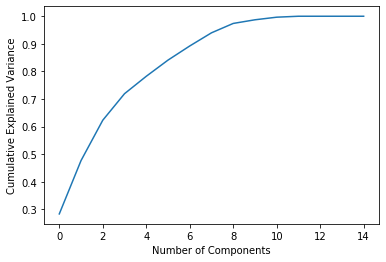

In [42]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [43]:
compo =  np.where(pca.explained_variance_ratio_.cumsum() > 0.99)
compo = np.squeeze(compo)
compo[0] + 1

11

In [44]:
pca = PCA(n_components=compo[0] + 1 )
df_pca_scale = pd.DataFrame(pca.fit_transform(df_pca))
df_pca_scale

,0,1,2,3,4,5,6,7,8,9,10
0,-0.769381,-0.462276,0.883125,-0.317596,-0.702601,0.065216,-0.409310,-0.132116,-0.060153,-0.038287,0.006131
1,-0.758165,-0.476341,0.878213,-0.329887,-0.715620,0.116829,-0.392646,-0.221408,-0.083508,-0.037702,0.007350
2,-0.764316,-0.468494,0.880928,-0.323211,-0.708390,0.088174,-0.401589,-0.171872,-0.070579,-0.038026,0.006669
3,-0.873101,0.468979,0.634710,-0.209338,-0.675712,0.185994,-0.472784,-0.312564,-0.076326,-0.037900,0.007851
4,0.338988,0.293008,-0.086498,1.042783,-0.417661,-0.209604,-0.183053,-0.515041,0.159364,0.055130,0.010324
...,...,...,...,...,...,...,...,...,...,...,...
29377,1.258631,0.627849,-0.095373,-0.588996,-0.070689,0.582432,0.340381,0.046142,0.941315,-0.104516,-0.231360
29378,0.493847,0.394767,-0.111562,0.737107,-0.401689,-0.263415,0.453666,-0.502353,0.100922,0.055680,0.004923
29379,1.060262,0.609582,-0.109569,-0.468318,0.075394,-0.092449,0.291471,-0.163405,-0.212678,0.038115,0.037692
29380,-0.114122,-0.626250,-0.183729,-0.392457,0.028549,0.106208,0.663107,-0.262987,-0.126886,-0.023450,0.001903


In [77]:
# x = df_pca_scale[df_pca_scale.columns.difference(['5k','10k','20k','half','25k','35k','30k','40k','official'])]
# y = df_pca_scale[df_pca_scale.columns['5k','10k','20k','half','25k','35k','30k','40k','official']]

In [38]:
# x
# y

In [165]:
from sklearn.cluster import KMeans
ks = range(1,12)
inertias = []
for k in ks:
    kmeans = KMeans(n_clusters = k,init = 'k-means++', random_state=0)
    kmeans.fit(t)
    inertias.append(kmeans.inertia_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=11, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [47]:
inertias_pca = []
for k in ks:
    kmeans = KMeans(n_clusters = k,init = 'k-means++', random_state=0)
    kmeans.fit(df_pca_scale)
    inertias_pca.append(kmeans.inertia_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=11, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

Text(0.5, 0, 'number of clusters, k')

Text(0, 0.5, 'inertia')

Text(0.5, 1.0, 'The Elbow Method using Distortion')

([<matplotlib.axis.XTick at 0x268f7870b48>,
 <a list of 11 Text xticklabel objects>)

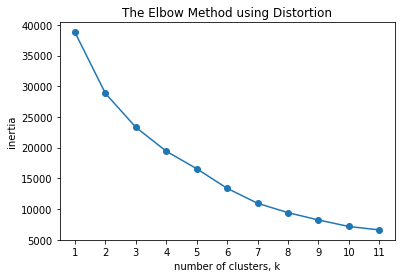

In [166]:
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.title('The Elbow Method using Distortion')
plt.xticks(ks)
plt.show()

# plt.figure(figsize=(10,5))
# sns.lineplot(ks, inertias,marker='o',color='red')
# plt.title('The Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()

Text(0.5, 0, 'number of clusters, k')

Text(0, 0.5, 'inertia')

Text(0.5, 1.0, 'The Elbow Method using Distortion')

([<matplotlib.axis.XTick at 0x255f7300b88>,
 <a list of 11 Text xticklabel objects>)

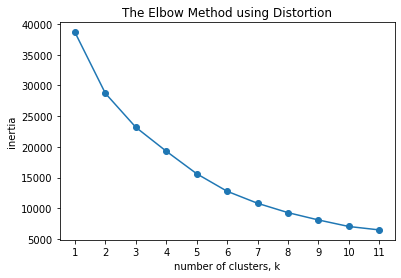

In [51]:
plt.plot(ks, inertias_pca, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.title('The Elbow Method using Distortion')
plt.xticks(ks)
plt.show()

Choose k = 3,4,5,6

### Silhouette Score

Without PCA

In [167]:
from sklearn import metrics
ks = range(2,10)
silhouetteScore=[]
for k in ks:
#     print('n_clusters: ',k)
    kmeans = KMeans(n_clusters = k,random_state=0)
    kmeans.fit(t)
    label = kmeans.predict(t)
    silhouetteScore.append(metrics.silhouette_score(t, label, metric='euclidean'))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [168]:
silhouetteScore

[0.33178203500542536,
 0.36540345666365226,
 0.3628754226250139,
 0.4047465547213878,
 0.44511905106044863,
 0.49033894630066116,
 0.5055561651701487,
 0.5253746829740961]

Text(0.5, 0, 'number of clusters, k')

Text(0, 0.5, 'silhouette score')

([<matplotlib.axis.XTick at 0x14307c70>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

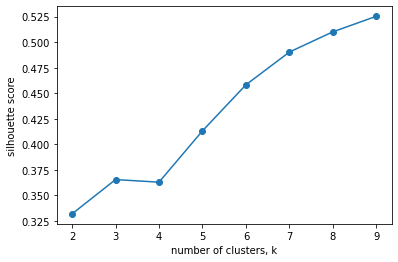

In [98]:
# Plot ks vs inertias
plt.plot(ks, silhouetteScore, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('silhouette score')
plt.xticks(ks)
plt.show()

In [54]:
silhouetteScore_pca=[]
for k in ks:
#     print('n_clusters: ',k)
    kmeans = KMeans(n_clusters = k,random_state=0)
    kmeans.fit(df_pca_scale)
    label = kmeans.predict(df_pca_scale)
    silhouetteScore_pca.append(metrics.silhouette_score(df_pca_scale, label, metric='euclidean'))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [55]:
silhouetteScore_pca

[0.33365033639527025,
 0.3677737280167632,
 0.36656800613881607,
 0.4180661834686844,
 0.463399375368191,
 0.4956774955052658,
 0.5114610825805784,
 0.531699526751088]

Text(0.5, 0, 'number of clusters, k')

Text(0, 0.5, 'silhouette score')

([<matplotlib.axis.XTick at 0x255f7351808>,
 <a list of 8 Text xticklabel objects>)

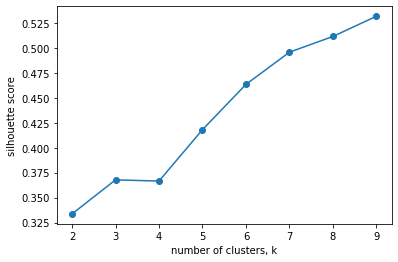

In [56]:
# Plot ks vs inertias
plt.plot(ks, silhouetteScore_pca, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('silhouette score')
plt.xticks(ks)
plt.show()

==> Choose k = 5

(-0.1, 1.0)

(0.0, 29412.0)

For n_clusters = 2 The average silhouette_score is : 0.33178203500542536


Text(-0.05, 5348.0, '0')

Text(-0.05, 20049.0, '1')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

(-0.1, 1.0)

(0.0, 29422.0)

For n_clusters = 3 The average silhouette_score is : 0.36540345666365226


Text(-0.05, 4835.0, '0')

Text(-0.05, 17239.0, '1')

Text(-0.05, 27115.0, '2')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

(-0.1, 1.0)

(0.0, 29432.0)

For n_clusters = 4 The average silhouette_score is : 0.3628754226250139


Text(-0.05, 2307.0, '0')

Text(-0.05, 9861.0, '1')

Text(-0.05, 18098.5, '2')

Text(-0.05, 25255.5, '3')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

(-0.1, 1.0)

(0.0, 29442.0)

For n_clusters = 5 The average silhouette_score is : 0.4131484891008866


Text(-0.05, 1854.5, '0')

Text(-0.05, 7047.0, '1')

Text(-0.05, 12692.0, '2')

Text(-0.05, 17979.5, '3')

Text(-0.05, 25201.0, '4')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

(-0.1, 1.0)

(0.0, 29452.0)

For n_clusters = 6 The average silhouette_score is : 0.45825905028809144


Text(-0.05, 1242.5, '0')

Text(-0.05, 5823.0, '1')

Text(-0.05, 12151.5, '2')

Text(-0.05, 19373.0, '3')

Text(-0.05, 25458.5, '4')

Text(-0.05, 28377.5, '5')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

(-0.1, 1.0)

(0.0, 29462.0)

For n_clusters = 7 The average silhouette_score is : 0.4734415739337131


Text(-0.05, 1356.0, '0')

Text(-0.05, 6050.0, '1')

Text(-0.05, 13629.0, '2')

Text(-0.05, 18934.5, '3')

Text(-0.05, 21241.5, '4')

Text(-0.05, 24118.5, '5')

Text(-0.05, 27607.5, '6')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

(-0.1, 1.0)

(0.0, 29472.0)

For n_clusters = 8 The average silhouette_score is : 0.5055561651701487


Text(-0.05, 1356.0, '0')

Text(-0.05, 6943.0, '1')

Text(-0.05, 14522.0, '2')

Text(-0.05, 19504.5, '3')

Text(-0.05, 22381.5, '4')

Text(-0.05, 24688.5, '5')

Text(-0.05, 26505.5, '6')

Text(-0.05, 28360.0, '7')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

(-0.1, 1.0)

(0.0, 29482.0)

For n_clusters = 9 The average silhouette_score is : 0.5253746829740961


Text(-0.05, 1156.0, '0')

Text(-0.05, 6543.0, '1')

Text(-0.05, 14122.0, '2')

Text(-0.05, 18909.0, '3')

Text(-0.05, 21590.5, '4')

Text(-0.05, 23897.5, '5')

Text(-0.05, 25714.5, '6')

Text(-0.05, 27569.0, '7')

Text(-0.05, 29076.5, '8')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

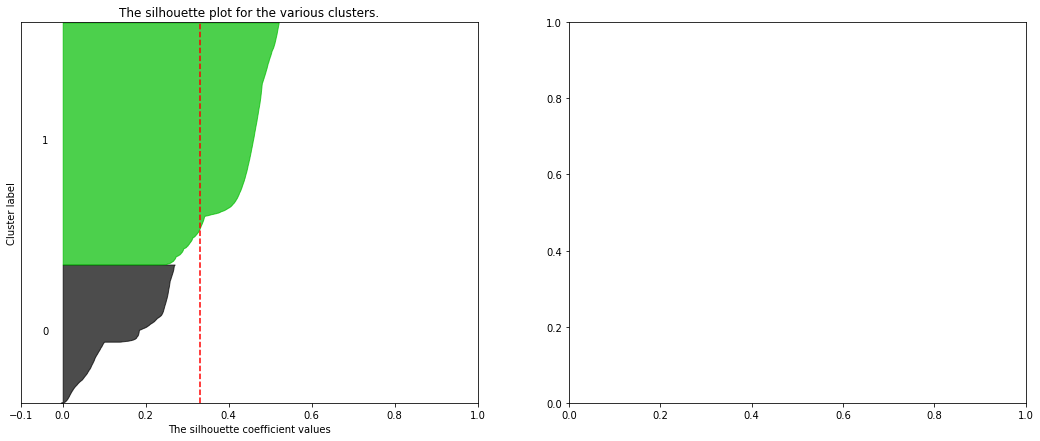

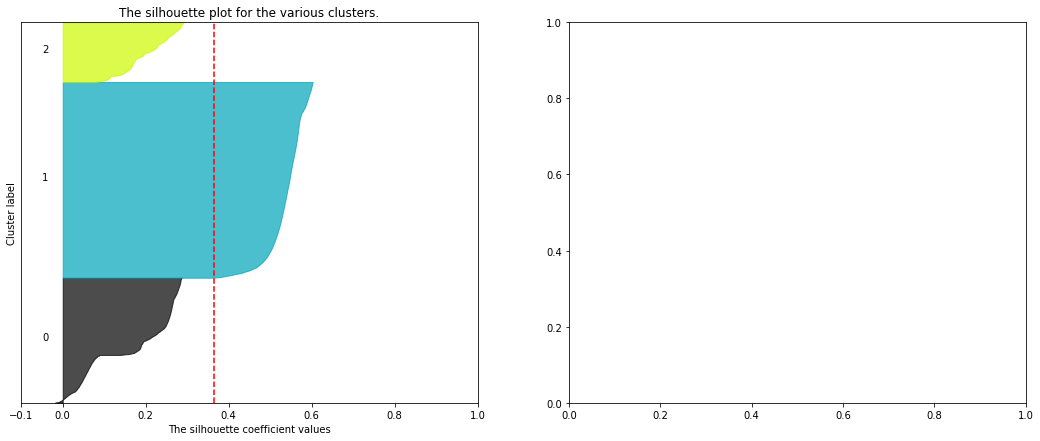

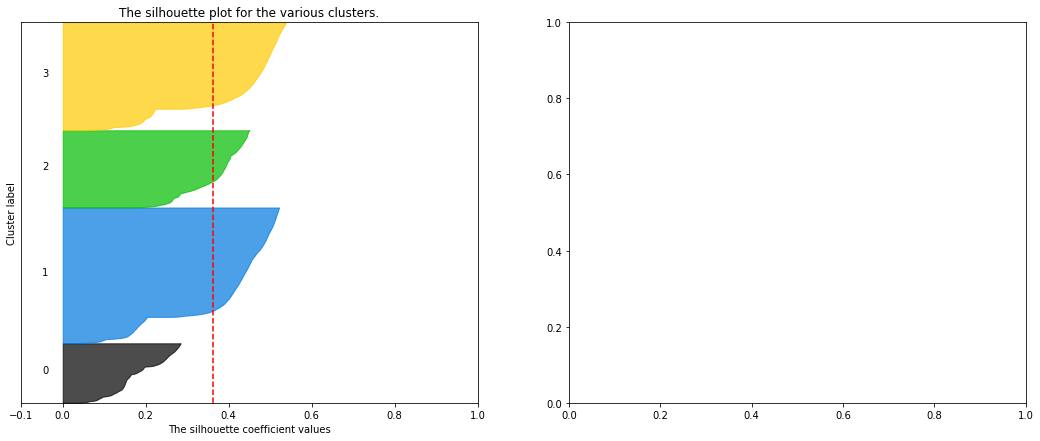

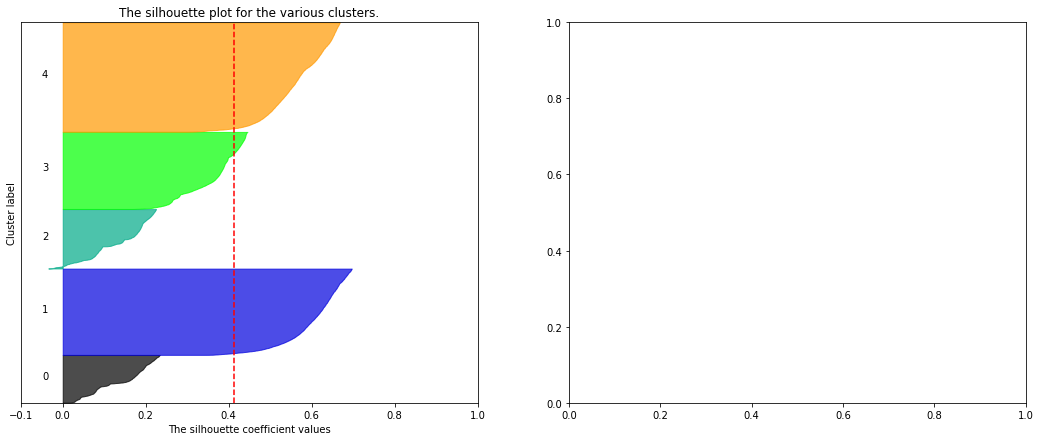

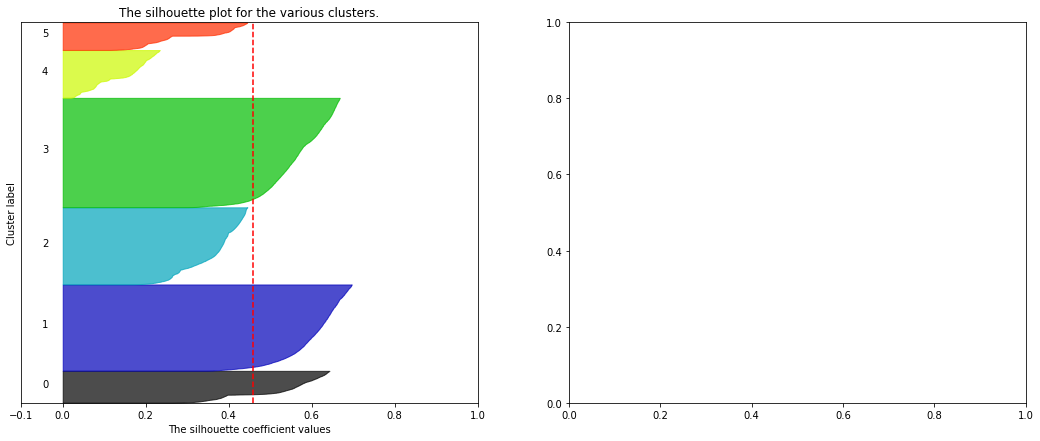

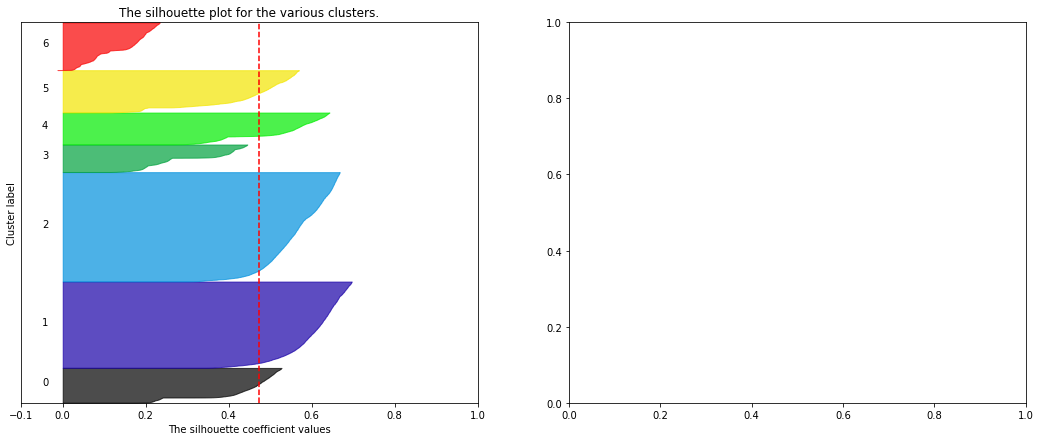

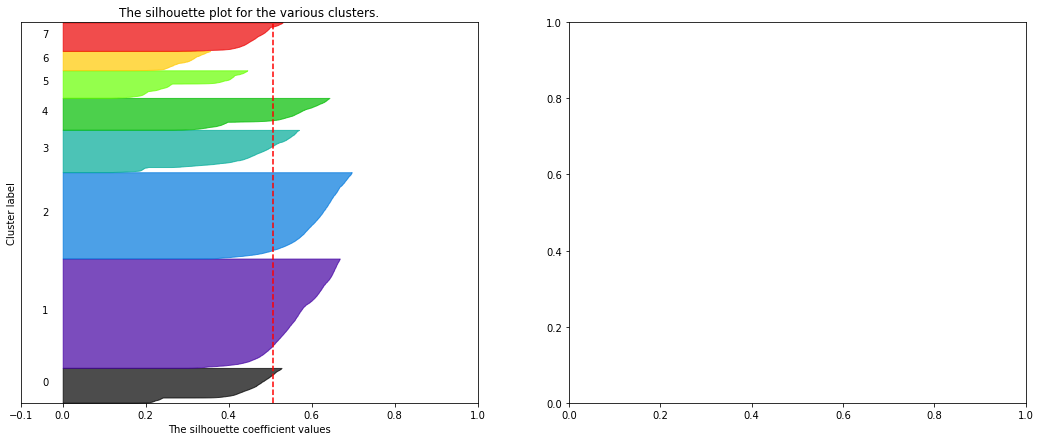

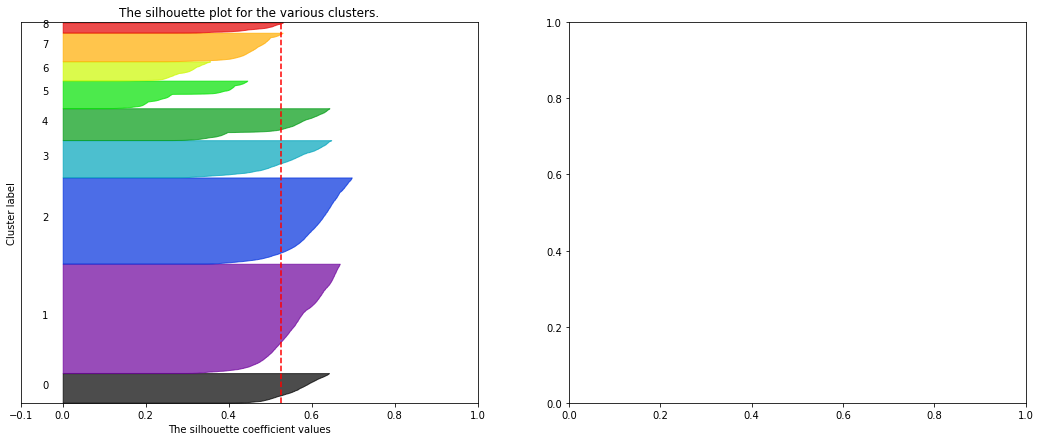

In [58]:
ks = range(2,10)
import matplotlib.cm as cm
for n_clusters in ks:
#     Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = metrics.silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
#     colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
#     ax2.scatter(x[:, 0], x[:, 1], marker='.', s=30, lw=0, alpha=0.7,
#                 c=colors, edgecolor='k')

#     # Labeling the clusters
#     centers = clusterer.cluster_centers_
#     # Draw white circles at cluster centers
#     ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
#                 c="white", alpha=1, s=200, edgecolor='k')

#     for i, c in enumerate(centers):
#         ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
#                     s=50, edgecolor='k')

#     ax2.set_title("The visualization of the clustered data.")
#     ax2.set_xlabel("Feature space for the 1st feature")
#     ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

(-0.1, 1.0)

(0.0, 29412.0)

For n_clusters = 2 The average silhouette_score is : 0.6232845497612598


Text(-0.05, 7420.0, '0')

Text(-0.05, 22121.0, '1')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

Text(0.5, 1.0, 'The visualization of the clustered data.')

Text(0.5, 0, 'Feature space for the 1st feature')

Text(0, 0.5, 'Feature space for the 2nd feature')

Text(0.5, 0.98, 'Silhouette analysis for KMeans clustering on sample data with n_clusters = 2')

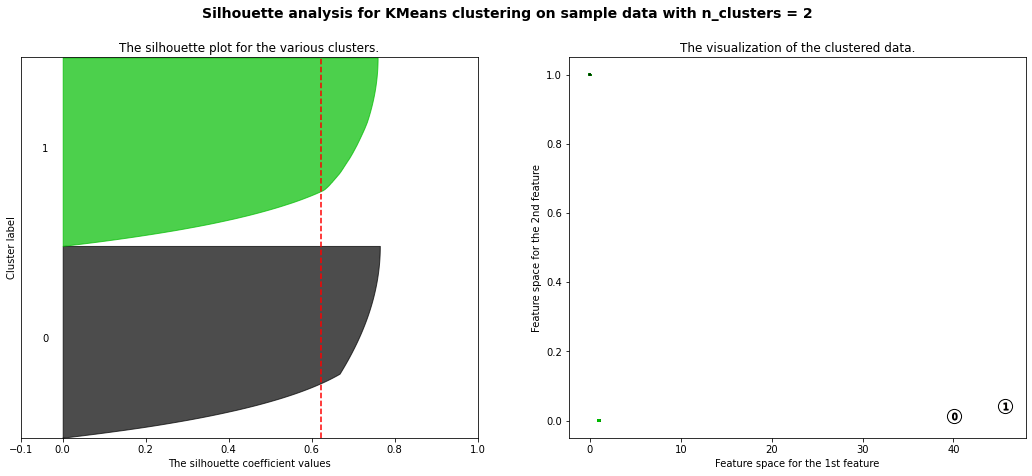

In [65]:
# ks = [2]
# for n_clusters in ks:
# #     Create a subplot with 1 row and 2 columns
#     fig, (ax1, ax2) = plt.subplots(1, 2)
#     fig.set_size_inches(18, 7)

#     # The 1st subplot is the silhouette plot
#     # The silhouette coefficient can range from -1, 1 but in this example all
#     # lie within [-0.1, 1]
#     ax1.set_xlim([-0.1, 1])
#     # The (n_clusters+1)*10 is for inserting blank space between silhouette
#     # plots of individual clusters, to demarcate them clearly.
#     ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

#     # Initialize the clusterer with n_clusters value and a random generator
#     # seed of 10 for reproducibility.
#     clusterer = KMeans(n_clusters=n_clusters, random_state=10)
#     cluster_labels = clusterer.fit_predict(x)

#     # The silhouette_score gives the average value for all the samples.
#     # This gives a perspective into the density and separation of the formed
#     # clusters
#     silhouette_avg = metrics.silhouette_score(x, cluster_labels)
#     print("For n_clusters =", n_clusters,
#           "The average silhouette_score is :", silhouette_avg)

#     # Compute the silhouette scores for each sample
#     sample_silhouette_values = metrics.silhouette_samples(x, cluster_labels)

#     y_lower = 10
#     for i in range(n_clusters):
#         # Aggregate the silhouette scores for samples belonging to
#         # cluster i, and sort them
#         ith_cluster_silhouette_values = \
#             sample_silhouette_values[cluster_labels == i]

#         ith_cluster_silhouette_values.sort()

#         size_cluster_i = ith_cluster_silhouette_values.shape[0]
#         y_upper = y_lower + size_cluster_i

#         color = cm.nipy_spectral(float(i) / n_clusters)
#         ax1.fill_betweenx(np.arange(y_lower, y_upper),
#                           0, ith_cluster_silhouette_values,
#                           facecolor=color, edgecolor=color, alpha=0.7)

#         # Label the silhouette plots with their cluster numbers at the middle
#         ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

#         # Compute the new y_lower for next plot
#         y_lower = y_upper + 10  # 10 for the 0 samples

#     ax1.set_title("The silhouette plot for the various clusters.")
#     ax1.set_xlabel("The silhouette coefficient values")
#     ax1.set_ylabel("Cluster label")

#     # The vertical line for average silhouette score of all the values
#     ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

#     ax1.set_yticks([])  # Clear the yaxis labels / ticks
#     ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

#     # 2nd Plot showing the actual clusters formed
#     colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
#     ax2.scatter(x.iloc[:, 7], x.iloc[:, 8], marker='.', s=30, lw=0, alpha=0.7,
#                 c=colors, edgecolor='k')

#     # Labeling the clusters
#     centers = clusterer.cluster_centers_
#     # Draw white circles at cluster centers
#     ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
#                 c="white", alpha=1, s=200, edgecolor='k')

#     for i, c in enumerate(centers):
#         ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
#                     s=50, edgecolor='k')

#     ax2.set_title("The visualization of the clustered data.")
#     ax2.set_xlabel("Feature space for the 1st feature")
#     ax2.set_ylabel("Feature space for the 2nd feature")

#     plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
#                   "with n_clusters = %d" % n_clusters),
#                  fontsize=14, fontweight='bold')
    
     # 2nd Plot showing the actual clusters formed
#     colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
#     ax1.scatter(x.iloc[:, 0], y.iloc[:, 0], marker='.', s=30, lw=0, alpha=0.7,
#                 c=colors, edgecolor='k')

#     # Labeling the clusters
#     centers = clusterer.cluster_centers_
#     # Draw white circles at cluster centers
#     ax1.scatter(centers[:, 0], centers[:, 1], marker='o',
#                 c="white", alpha=1, s=200, edgecolor='k')

#     for i, c in enumerate(centers):
#         ax1.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
#                     s=50, edgecolor='k')

#     ax1.set_title("The visualization of the clustered data.")
#     ax1.set_xlabel("Feature space for the 1st feature")
#     ax1.set_ylabel("Feature space for the 2nd feature")

#     plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
#                   "with n_clusters = %d" % n_clusters),
#                  fontsize=14, fontweight='bold')


plt.show()

In [59]:
# y.iloc[:, 1]
# x

### Gender

In [169]:
kmeans=KMeans(n_clusters=4,random_state=0)
kmeans.fit(t)
label = kmeans.predict(t)
label

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

array([0, 0, 0, ..., 2, 3, 1])

In [170]:
df3 = df.copy()
df3['Label'] = label
df3.head()

,10k,division,25k,gender,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k,state_1,city_1,country_1,Label
1,32.58,1,82.43,F,33,138.95,1,116.37,21,5.30,99.33,16.22,69.47,65.83,132.10,Other,Other,Other,0
3,32.57,3,82.43,F,24,140.58,3,116.37,27,5.37,99.33,16.20,69.47,65.83,132.95,Other,Other,Other,0
5,32.58,4,82.45,F,29,140.68,4,116.37,28,5.37,99.33,16.22,69.47,65.83,132.95,Other,Other,Other,0
7,30.48,5,76.95,M,29,129.83,5,107.47,5,4.97,92.52,15.17,64.85,61.62,122.80,Other,Other,Other,0
9,30.48,20,77.68,M,31,137.83,20,112.27,20,5.27,94.78,15.15,65.23,61.78,129.83,CA,Other,USA,1


In [99]:
 df3.groupby(['gender', 'Label']).size()

gender  Label
F       1         2692
        2         8333
        3         1521
M       0        10494
        1         3269
        3         3073
dtype: int64

<AxesSubplot:xlabel='Label', ylabel='count'>

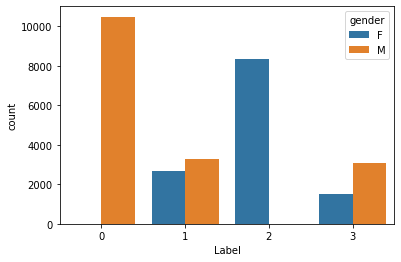

In [100]:
sns.countplot(data=df3,x='Label',hue='gender')

1. Total data point in each clusters are different, cluster 1 have the most data point
2. Cluster 0 and 2 have only 1 value in which
4. The rate of Male is higher then Female'one in cluster 1,3

### Gender

Split into 4 groups:

1. Age [18-25]
2. Age [26-40]
3. Age [40-70]
4. Age 70+

In [72]:
def Age(num):
    if( (num >= 18) and (num <=25)):
        return 0
    elif( (num >= 26) and (num <=40)):
        return 1
    elif( (num >= 41) and (num <=70)):
        return 2
    elif(num > 70):
        return 3
    else:
        return -1

In [101]:
df4 = df3.copy()
df4['Age_1']=df4['age'].map(Age)
df4.head()

,10k,division,25k,gender,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k,state_1,city_1,country_1,Label,Age_1
1,32.58,1,82.43,F,33,138.95,1,116.37,21,5.30,99.33,16.22,69.47,65.83,132.10,Other,Other,Other,3,1
3,32.57,3,82.43,F,24,140.58,3,116.37,27,5.37,99.33,16.20,69.47,65.83,132.95,Other,Other,Other,3,0
5,32.58,4,82.45,F,29,140.68,4,116.37,28,5.37,99.33,16.22,69.47,65.83,132.95,Other,Other,Other,3,1
7,30.48,5,76.95,M,29,129.83,5,107.47,5,4.97,92.52,15.17,64.85,61.62,122.80,Other,Other,Other,3,1
9,30.48,20,77.68,M,31,137.83,20,112.27,20,5.27,94.78,15.15,65.23,61.78,129.83,CA,Other,USA,0,1


In [102]:
df4.groupby(['Age_1', 'Label']).size()

Age_1  Label
0      0         477
       1         544
       2         602
       3          62
1      0        3222
       1        2646
       2        3416
       3        1196
2      0        6715
       1        2763
       2        4310
       3        3307
3      0          80
       1           8
       2           5
       3          29
dtype: int64

<AxesSubplot:xlabel='Label', ylabel='count'>

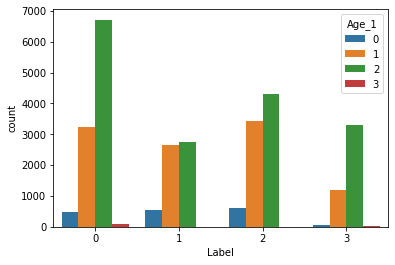

In [103]:
sns.countplot(data=df4,x='Label',hue='Age_1')

1. Age group 2 [40-70] is the highest group in all clusters. Last and next position is group 1 [18-25] and 3 [70+] respectively
2. Most age is group 2,1,0,3


### Finish Time

Official time with 3 cluster

In [106]:
df3.groupby('Label')['official'].mean()

Label
0    219.842885
1    262.307148
2    235.811631
3    229.046117
Name: official, dtype: float64

Official time with 4 cluster

In [171]:
df3.groupby('Label')['official'].mean()

Label
0    229.046117
1    219.842885
2    262.307148
3    235.811631
Name: official, dtype: float64

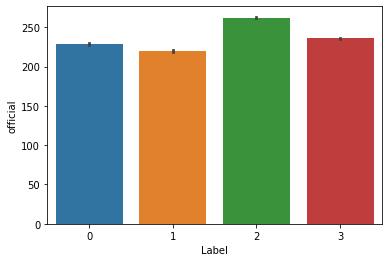

In [172]:
# sns.countplot(data=df4,x='Label',hue='official')
sns.barplot(x='Label',y='official',data=df3)

Official time with 5 cluster

In [96]:
df3.groupby('Label')['official'].mean()

Label
0    236.242199
1    219.853936
2    262.307148
3    229.046117
4    226.211068
Name: official, dtype: float64

-----------------------------------------------------

In [104]:
df3.groupby('Label')['5k'].mean()

Label
0    23.607689
1    27.775207
2    25.533094
3    24.515189
Name: 5k, dtype: float64

In [105]:
df3.groupby('Label')['10k'].mean()

Label
0    47.338089
1    55.674367
2    51.319047
3    49.271733
Name: 10k, dtype: float64

In [106]:
df3.groupby('Label')['20k'].mean()

Label
0     95.931675
1    113.394675
2    104.373331
3    100.183380
Name: 20k, dtype: float64

In [107]:
df3.groupby('Label')['half'].mean()

Label
0    101.282270
1    119.723045
2    110.177427
3    105.772688
Name: half, dtype: float64

In [1]:
filtered_label0 = df3[label == 0]
filtered_label1 = df3[label == 1]
filtered_label2 = df3[label == 2]
filtered_label3 = df3[label == 3]

plt.scatter(filtered_label0.iloc[:,0] , filtered_label0.iloc[:,1] , color = 'red')
plt.scatter(filtered_label1.iloc[:,0] , filtered_label1.iloc[:,1] , color = 'black')
# plt.scatter(filtered_label2.iloc[:,0] , filtered_label2.iloc[:,1] , color = 'green')
# plt.scatter(filtered_label3.iloc[:,0] , filtered_label3.iloc[:,1] , color = 'blue')
plt.show()

NameError: name 'df3' is not defined

In [2]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(x[label == 0, 0], x[label == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x[label == 1, 0], x[label == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x[label == 2, 0], x[label == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x[label == 3, 0], x[label == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
# sns.scatterplot(x[label == 4, 0], x[label == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

In [109]:
df.head()

,10k,division,25k,gender,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k,state_1,city_1,country_1
1,32.58,1,82.43,F,33,138.95,1,116.37,21,5.30,99.33,16.22,69.47,65.83,132.10,Other,Other,Other
3,32.57,3,82.43,F,24,140.58,3,116.37,27,5.37,99.33,16.20,69.47,65.83,132.95,Other,Other,Other
5,32.58,4,82.45,F,29,140.68,4,116.37,28,5.37,99.33,16.22,69.47,65.83,132.95,Other,Other,Other
7,30.48,5,76.95,M,29,129.83,5,107.47,5,4.97,92.52,15.17,64.85,61.62,122.80,Other,Other,Other
9,30.48,20,77.68,M,31,137.83,20,112.27,20,5.27,94.78,15.15,65.23,61.78,129.83,CA,Other,USA


In [32]:
x

array([[0.26315789, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.10526316, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.19298246, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.28070175, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05263158, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.63157895, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

### KPrototype

In [118]:
df5 = df.copy()
df5.drop(['pace','overall'],axis =1, inplace = True)
z = df5[df5.columns.difference(['5k','10k','20k','half','25k','35k','30k','40k','official'])]

In [131]:
# for c in z.select_dtypes(exclude='object').columns:
#     scaler=MinMaxScaler(feature_range=(0, 1), copy=True)
#     n[c]=scaler.fit_transform(z)


In [74]:
lista=[]
for i in range(2,12):
    nc=i
#     start = time.time()
    kp = KPrototypes(n_clusters = nc, init = 'Cao', random_state=0 )
    clusters=kp.fit_predict(z.values, categorical = [1,2,3,4,5,6])
#     end = time.time()
    lista.append([i,"Silhouette Coefficient: %0.3f"% metrics.silhouette_score(z.iloc[:,0:1], kp.labels_),'cost: %0.3f'%kp.cost_
                                     ])

In [75]:
lista

[[2, 'Silhouette Coefficient: 0.558', 'cost: 52978.846'],
 [3, 'Silhouette Coefficient: 0.525', 'cost: 47916.259'],
 [4, 'Silhouette Coefficient: 0.265', 'cost: 44873.733'],
 [5, 'Silhouette Coefficient: 0.172', 'cost: 43098.624'],
 [6, 'Silhouette Coefficient: 0.140', 'cost: 42142.088'],
 [7, 'Silhouette Coefficient: 0.095', 'cost: 40903.513'],
 [8, 'Silhouette Coefficient: 0.019', 'cost: 40023.241'],
 [9, 'Silhouette Coefficient: 0.032', 'cost: 39406.144'],
 [10, 'Silhouette Coefficient: 0.058', 'cost: 39348.234'],
 [11, 'Silhouette Coefficient: -0.006', 'cost: 38726.163']]

In [97]:
# Running K-Prototype clustering
kproto_2 = KPrototypes(n_clusters=2, init='Cao',  random_state=0) 
lable_2 = kproto.fit_predict(z, categorical=[1,2,3,4,5,6])

In [126]:
# Running K-Prototype clustering
kproto_3 = KPrototypes(n_clusters=3, init='Cao',  random_state=0) 
lable_3 = kproto.fit_predict(z, categorical=[1,2,3,4,5,6])

In [110]:
# Running K-Prototype clustering
kproto_3H = KPrototypes(n_clusters=3, init='Huang',  random_state=0) 
lable_3H = kproto.fit_predict(z, categorical=[1,2,3,4,5,6])

In [127]:
# df6 = df.copy()
df6['Label3'] = lable_3
df6.tail()

,10k,division,25k,gender,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k,state_1,city_1,country_1,Label,Label1,Label3,Label2,Label3H
31977,63.33,5217,165.40,M,37,302.93,15472,246.65,27490,11.57,208.53,29.82,136.98,130.45,286.62,MA,Boston,USA,0,0,3,3,1
31979,50.72,3414,124.02,M,32,211.75,7500,174.90,9849,8.08,148.65,26.13,104.78,99.55,200.22,CA,Other,USA,0,0,3,3,0
31980,61.28,5212,165.02,M,34,302.52,15459,244.70,27456,11.55,203.43,31.07,135.85,128.37,285.47,MA,Other,USA,0,0,3,3,1
31981,59.00,5231,157.02,F,21,282.00,10788,229.62,25092,10.77,192.65,28.18,130.57,123.33,266.30,Other,Other,USA,0,0,2,2,0
31983,53.63,1396,135.02,M,54,228.30,9771,189.68,14844,8.72,161.83,26.92,114.13,108.03,216.48,Other,Other,USA,1,1,1,1,3


In [128]:
df6.groupby('Label3')['official'].mean()
# df6['Label1'].value_counts()

Label3
0    237.060036
1    255.670306
2    222.293578
3    225.345785
Name: official, dtype: float64

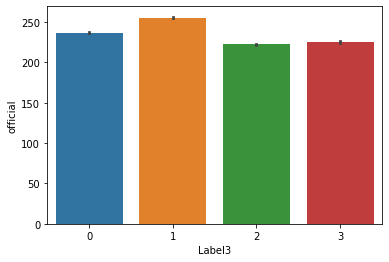

In [129]:
sns.barplot(x='Label3',y='official',data=df6)

In [42]:
from sklearn import metrics
# ks = range(2,10)
# silhouetteScore=[]
# for k in ks:
#     print('n_clusters: ',k)
# kmeans = KMeans(n_clusters = k,random_state=0)
# kmeans.fit(t)
# label = kmeans.predict(t)
# labels=kproto.labels_
# silhouetteScore_kp = (metrics.silhouette_score(z, y_kprototypes, metric='precomputed'))
kproto.cost_
# y_kprototypes

93776058008.41458

In [130]:
# z_num = t['age']
z
t.info()

,age,city_1,country_1,division,gender,genderdiv,state_1
1,-0.877313,Other,Other,1,F,1,Other
3,-1.772084,Other,Other,3,F,3,Other
5,-1.266312,Other,Other,4,F,4,Other
7,-1.266312,Other,Other,5,M,5,Other
9,-1.070242,Other,USA,20,M,20,CA
...,...,...,...,...,...,...,...
31977,-0.499982,Boston,USA,5217,M,15472,MA
31979,-0.973400,Other,USA,3414,M,7500,CA
31980,-0.781953,Other,USA,5212,M,15459,MA
31981,-2.088044,Other,USA,5231,F,10788,Other


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29382 entries, 0 to 29381
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              29382 non-null  float64
 1   city_1_Boston    29382 non-null  float64
 2   city_1_New York  29382 non-null  float64
 3   city_1_Other     29382 non-null  float64
 4   country_1_CAN    29382 non-null  float64
 5   country_1_Other  29382 non-null  float64
 6   country_1_USA    29382 non-null  float64
 7   division         29382 non-null  float64
 8   gender_F         29382 non-null  float64
 9   genderdiv        29382 non-null  float64
 10  state_1_CA       29382 non-null  float64
 11  state_1_MA       29382 non-null  float64
 12  state_1_NY       29382 non-null  float64
 13  state_1_ON       29382 non-null  float64
 14  state_1_Other    29382 non-null  float64
dtypes: float64(15)
memory usage: 3.4 MB


In [70]:
z.iloc[:,0:1]

,age
1,-0.877313
3,-1.772084
5,-1.266312
7,-1.266312
9,-1.070242
...,...
31977,-0.499982
31979,-0.973400
31980,-0.781953
31981,-2.088044


In [121]:
# data['overall'] = data['overall'].astype(dtype='category')
z['genderdiv'] = z['genderdiv'].astype(dtype='object')
z['division'] = z['division'].astype(dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [64]:
z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29382 entries, 1 to 31983
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        29382 non-null  int64 
 1   city_1     29382 non-null  object
 2   country_1  29382 non-null  object
 3   division   29382 non-null  int64 
 4   gender     29382 non-null  object
 5   genderdiv  29382 non-null  int64 
 6   state_1    29382 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.8+ MB


In [124]:
for c in z.select_dtypes(exclude='object').columns:
    pt = pp.PowerTransformer()
    z[c] =  pt.fit_transform(np.array(z[c]).reshape(-1, 1))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [123]:
# for c in z.select_dtypes(exclude='object').columns:
#     scaler=MinMaxScaler(feature_range=(0, 1), copy=True)
#     n[c]=scaler.fit_transform(z[c])